In [11]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [14]:
print("Number of zeros in the dataset : {}".format(len(df.loc[df['class'] == 0])))
print("Number of one's in the dataset : {}".format(len(df.loc[df['class'] == 1])))

Number of zeros in the dataset : 762
Number of one's in the dataset : 610


Text(0, 0.5, 'Count of 0s and 1s')

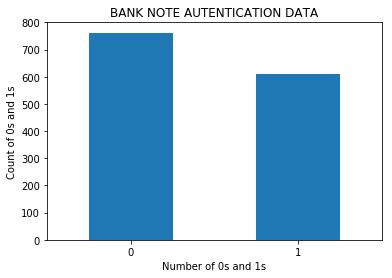

In [18]:
count = pd.value_counts(df['class'], sort=True)
count.plot(kind='bar', rot=0)
plt.title('BANK NOTE AUTENTICATION DATA')
plt.xlabel('Number of 0s and 1s')
plt.ylabel('Count of 0s and 1s')

In [20]:
#Seperating the Independent and Dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
prediction = classifier.predict(x_test)

In [28]:
#Testing the accuracy 
from sklearn.metrics import accuracy_score

In [29]:
score = accuracy_score(y_test, prediction)

In [30]:
score

0.9878640776699029

In [32]:
import pickle 
pickle_out = open('classifier.pkl', 'wb')
pickle.dump(classifier, pickle_out)
pickle_out.close()